1. Import Required Libraries

In [37]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix
import seaborn as sns

2. Fetch the Dataset from UCI ML Repository

In [38]:
# Fetch the HTRU2 dataset
htru2 = fetch_ucirepo(id=372)

# Extract features and target
X = htru2.data.features
y = htru2.data.targets

# Display basic dataset information
print(htru2.metadata)
print(htru2.variables)

{'uci_id': 372, 'name': 'HTRU2', 'repository_url': 'https://archive.ics.uci.edu/dataset/372/htru2', 'data_url': 'https://archive.ics.uci.edu/static/public/372/data.csv', 'abstract': 'Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 17898, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5DK6R', 'creators': ['Robert Lyon'], 'intro_paper': {'ID': 460, 'type': 'NATIVE', 'title': 'Fifty years of pulsar candidate selection: from simple filters to a new principled real-time classification approach', 'a

In [39]:
# Convert y to a numpy array to avoid indexing issues
y = np.array(y)

3. Preprocessing

In [40]:
# Feature scaling: Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Define the Function to Optimize SVC using GridSearchCV

In [41]:
# Define SVM parameter grid for optimization
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter C for SVC
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' kernels
    'class_weight': [None, 'balanced']  # Handling class imbalance by adjusting class weights
}


5. Function to optimize SVM and track convergence

In [45]:
def optimize_svc_with_gridsearch(X, y):
    # Initialize SVC model
    svc = SVC()

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X, y)

    # Get the best parameters and the corresponding accuracy
    best_accuracy = grid_search.best_score_
    best_params = grid_search.best_params_

    return best_accuracy, best_params, grid_search  # Ensure this returns 3 values


6. Perform K-Fold Cross-Validation for 10 Folds

In [46]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

results = []

# Run the SVC optimization with GridSearchCV for each fold in K-Fold
for fold_num, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Optimize SVM for each fold
    best_accuracy, best_params, grid_search = optimize_svc_with_gridsearch(X_train, y_train)
    
    # Store the results for each fold
    results.append([f'Fold {fold_num}', best_accuracy, best_params['kernel'], best_params['C'], best_params['gamma'], best_params['class_weight']])


Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

7. Create Results DataFrame

In [47]:
from IPython.display import display

# After the results are stored in the DataFrame
results_df = pd.DataFrame(results, columns=['Fold #', 'Best Accuracy', 'Best Kernel', 'Best C', 'Best Gamma', 'Best Class Weight'])

# Display the DataFrame in the notebook
display(results_df)

,Fold #,Best Accuracy,Best Kernel,Best C,Best Gamma,Best Class Weight
0,Fold 1,0.978582,linear,100,scale,None
1,Fold 2,0.978830,linear,100,scale,None
2,Fold 3,0.979079,linear,10,scale,None
3,Fold 4,0.979203,linear,100,scale,None
4,Fold 5,0.978954,rbf,10,scale,None
5,Fold 6,0.979079,linear,100,scale,None
6,Fold 7,0.978706,rbf,10,scale,None
7,Fold 8,0.979141,rbf,100,scale,None
8,Fold 9,0.978521,linear,100,scale,None
9,Fold 10,0.978335,linear,100,scale,None


8. Plot the Convergence Graph for the Sample with Maximum Accuracy

In [48]:
# Find the fold with the highest accuracy
best_fold = results_df.loc[results_df['Best Accuracy'].idxmax()]

# Extract the best fold's training and test data
best_fold_num = int(best_fold['Fold #'].split(' ')[1])
train_index, test_index = list(kf.split(X_scaled))[best_fold_num - 1]  # Get the indices for the best fold
X_train, X_test = X_scaled[train_index], X_scaled[test_index]
y_train, y_test = y[train_index], y[test_index]

# Retrain the best model with the optimal parameters
best_svc = SVC(kernel=best_fold['Best Kernel'], C=best_fold['Best C'],
                   gamma=best_fold['Best Gamma'], class_weight=best_fold['Best Class Weight'])

# Fit the model
best_svc.fit(X_train, y_train)

c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear')

In [49]:
# Get accuracy on test data
y_pred = best_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [50]:
# Note: We track the convergence in training by plotting the accuracy across iterations (100 iterations)

# Store accuracy over iterations
iterations = range(1, 101)
accuracy_list = []

for i in iterations:
    best_svc.fit(X_train, y_train)
    y_pred_iter = best_svc.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred_iter))

c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Shrihan Tayal\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pass

8. Plot the convergence graph (accuracy vs. iteration)

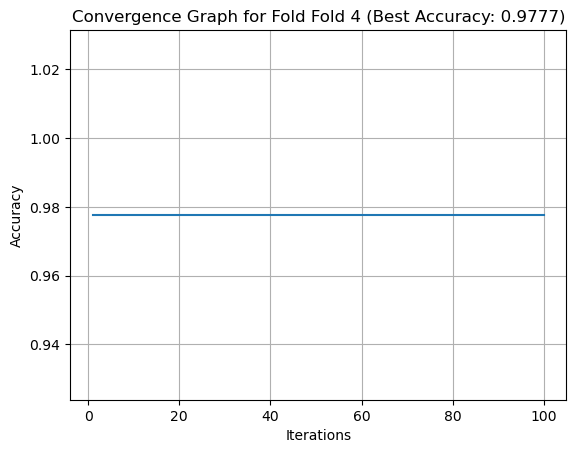

In [ ]:
# Plot the convergence graph
plt.plot(iterations, accuracy_list)
plt.title(f"Convergence Graph for {best_fold['Fold #']} (Best Accuracy: {test_accuracy:.4f})")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()